Καλό θα ήταν να έχουμε όλα τα imports μαζεμένα σε ένα κελί

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Αρχικά θα εισαγάγουμε το αρχείο που κατεβάσαμε από το workbebench και θα εκτυπωσουμε τις πρώτες 5 γραμμές του dataframe για να πάρουμε μία εικόνα του. 
Στο workbench για να εξαγάγουμε το συγκεκριμμένο τμήμα από την δοθείσα βάση δεδομένων χρησιμοποιήθηκαν οι εξής εντολές
```
use liquorsales;

SELECT *
FROM finance_liquor_sales
WHERE YEAR(date)
between 2016 and 2019;
```

In [2]:
df = pd.read_csv('exported.csv')
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-23548800092,2019-11-27 00:00:00,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
1,INV-23609300026,2019-12-02 00:00:00,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803.0,NaN,82,SCOTT,...,41844,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29
2,S30390600011,2016-01-26 00:00:00,2641,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.855054 41.261673),78,Pottawattamie,...,81124,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,1.20,0.32
3,S30348700047,2016-01-25 00:00:00,3162,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761.0,POINT (-91.06411300000002 41.408437),70,Muscatine,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.00,1.06
4,S30466200002,2016-02-01 00:00:00,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77,Polk,...,973627,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,120.00,31.70


Θα αλλάξουμε τη στήλη date να έχει μορφή ημερομηνίας και θα εκτυπώσουμε τον τύπο που έχουν οι στήλες

In [3]:
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

invoice_and_item_number            object
date                       datetime64[ns]
store_number                        int64
store_name                         object
address                            object
city                               object
zip_code                          float64
store_location                     object
county_number                       int64
county                             object
category                            int64
category_name                      object
vendor_number                       int64
vendor_name                        object
item_number                         int64
item_description                   object
pack                                int64
bottle_volume_ml                    int64
state_bottle_cost                 float64
state_bottle_retail               float64
bottles_sold                        int64
sale_dollars                      float64
volume_sold_liters                float64
volume_sold_gallons               

Το επόμενο βήμα είναι να δούμε, ανά στήλη, πόσες NaN τιμές περιλαμβάνονται στο σύνολο δεδομένων.

In [4]:
df.isna().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             9
county_number              0
county                     0
category                   0
category_name              6
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

Και αν θέλουμε να το δούμε πιο συνολικά έχουμε το ακόλουθο

In [5]:
total_missing_data = df.isna().sum().sum()

total_data = df.shape[0]*df.shape[1]

print('There is a total of {} missing data, which correspong to {:.2f}% of the total data'.format(total_missing_data, total_missing_data/total_data*100))

There is a total of 15 missing data, which correspong to 0.84% of the total data


Όπου παρατηρούμε οτι γενικά το ποσοστό των ελλιπών τιμών είναι μικρό. Θα αφαιρέσουμε τις τιμές αυτές για να προκύψει το 'καθαρό' σύνολο δεδομένων.

In [6]:
clean_df = df.dropna()
clean_df = clean_df.sort_values('date', ascending=False)
clean_df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
50,INV-24096400014,2019-12-23,2593,Hy-Vee Food Store / Carroll,905 US Highway 30 West,Carroll,51401.0,POINT (-94.853591 42.064155),14,CARROLL,...,27189,Basil Hayden Dark Rye,6,750,23.62,35.43,18,637.74,13.5,3.56
70,INV-24116900112,2019-12-23,2670,Hy-Vee Food Store / Coralville,2004 8th St,Coralville,52241.0,POINT (-91.591868 41.682337000000004),52,JOHNSON,...,65750,Maestro Agavero Gold,12,1000,7.00,10.50,48,504.00,48.0,12.68
12,INV-24014800058,2019-12-18,4312,I-80 Liquor / Council Bluffs,2411 S 24TH ST #1,Council Bluffs,51501.0,POINT (-95.8792 41.238092),78,POTTAWATTA,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,48,174.24,48.0,12.68
41,INV-23879500055,2019-12-12,2515,Hy-Vee Food Store #1 / Mason City,2400 4th St SW,Mason City,50401.0,POINT (-93.235588 43.148451),17,CERRO GORD,...,86843,Ole Smoky Salty Caramel Whiskey,6,750,10.00,15.00,18,270.00,13.5,3.56
40,INV-23828600019,2019-12-11,5146,Fareway Stores #153 / W Des Moines,329 Grand Ave,West Des Moines,50265.0,POINT (-93.70689 41.58269000000001),77,POLK,...,67526,Kahlua Coffee,12,750,12.49,18.74,72,1349.28,54.0,14.26


Παρατηρούμε οτι όντως οι αρχικές τιμές είναι στο έτος 2019. Ας δούμε και τις τελευταίες τιμές του dataframe αν αφορούν το έτος 2016

In [7]:
clean_df.tail()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
8,S30506300012,2016-02-02,2562,Hy-Vee Food Store / Fort Dodge,115 SOUTH 29TH ST,FORT DODGE,50501.0,POINT (-94.15824700000002 42.504742),94,Webster,...,38176,Titos Vodka,12,750,9.65,14.48,108,1563.84,81.0,21.40
4,S30466200002,2016-02-01,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77,Polk,...,973627,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,120.0,31.70
2,S30390600011,2016-01-26,2641,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.855054 41.261673),78,Pottawattamie,...,81124,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,1.2,0.32
3,S30348700047,2016-01-25,3162,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761.0,POINT (-91.06411300000002 41.408437),70,Muscatine,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.0,1.06
73,S30234800064,2016-01-15,4829,Central City 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT (-93.613739 41.60572),77,Polk,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,60,217.80,60.0,15.85


Προκειμένου να απαντηθεί το ερώτημα, θα επιλέξουμε από το dataframe τις στήλες που μας ενδιαφέρουν [για να έχουμε ενα πιο ΄συμπαγές΄ σύνολο δεδομένων], θα ομαδοποιήσουμε το σύνολο δεδομένων με βάση τη στήλη `zip_code` και `item_number` και θα αθροίσουμε (ουσιαστικά η άθροιση θα γίνει στην εναπομείνουσα στήλη `bottles_sold`).
Θα ταξινομήσουμε τις τιμές και η ζητούμενη θα είναι ουσιαστικά η πρώτη τιμή του dataframe

In [8]:
item_popularity_per_zip_code = clean_df[['zip_code', 'item_number', 'bottles_sold']].groupby(['zip_code', 'item_number']).sum()
item_popularity_per_zip_code = item_popularity_per_zip_code.sort_values('bottles_sold', ascending = False).reset_index()
item_popularity_per_zip_code['zip_code'] = item_popularity_per_zip_code['zip_code'].astype(int)
print('The item that sold most items per zipcode is {}, which sold {} number of bottles at zipcode {}.'.format(item_popularity_per_zip_code['item_number'].iloc[0], item_popularity_per_zip_code['bottles_sold'].iloc[0], item_popularity_per_zip_code['zip_code'].iloc[0]))

The item that sold most items per zipcode is 75087, which sold 1560 number of bottles at zipcode 52314.


Ας δούμε - για εποπτικούς λόγους - και τις πρώτες 5 γραμμές του συνόλου δεδομένων.

In [9]:
item_popularity_per_zip_code.head()

,zip_code,item_number,bottles_sold
0,52314,75087,1560
1,50702,77487,768
2,50010,946574,288
3,50314,86251,240
4,51106,67527,240


Text(0, 0.5, 'Bottles Sold')

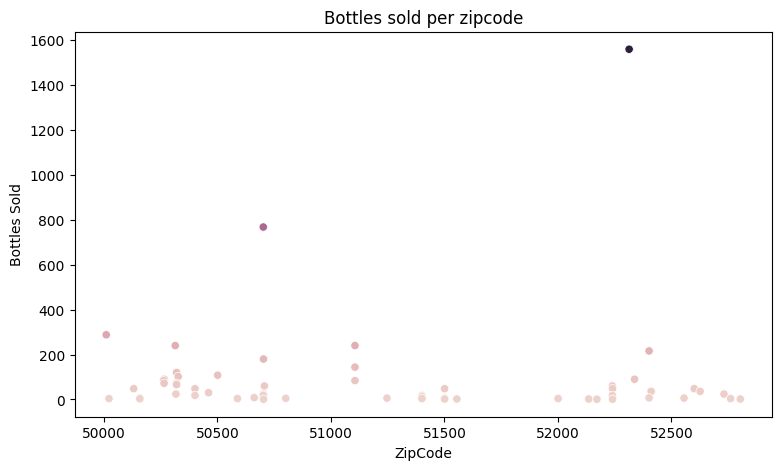

In [10]:
fig, ax = plt.subplots(figsize=(9,5))
sns.scatterplot(item_popularity_per_zip_code, x='zip_code', y='bottles_sold', hue='bottles_sold', legend=False, ax=ax)
plt.title('Bottles sold per zipcode')
plt.xlabel('ZipCode')
plt.ylabel('Bottles Sold')